In [24]:
%pip install -q scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.chdir('../')

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

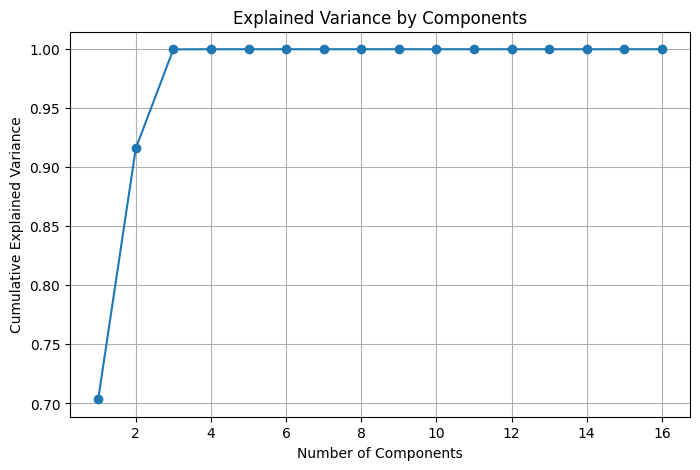

Top 5 features for PC1: ['Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'PropertyGFATotal', 'OSEBuildingID']
Top 5 features for PC2: ['NaturalGas(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'PropertyGFATotal', 'OSEBuildingID']
Top 5 features for PC3: ['SteamUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'PropertyGFATotal', 'OSEBuildingID']
Top 5 features for PC4: ['PropertyGFATotal', 'Electricity(kBtu)', 'OSEBuildingID', 'SteamUse(kBtu)', 'NaturalGas(kBtu)']
Top 5 features for PC5: ['OSEBuildingID', 'PropertyGFATotal', 'YearBuilt', 'Electricity(kBtu)', 'SteamUse(kBtu)']
Top 5 features for PC6: ['SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'ENERGYSTARScore', 'ZipCode', 'GHGEmissionsIntensity']
Top 5 features for PC7: ['YearBuilt', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'ZipCode']
Top 5 features for PC8: ['ENERGYSTARScore', 'YearBuilt', 'SourceEUI(kBtu/sf)', 'ZipCode', 'SiteEUI(kBtu/sf)']
Top 5 features for PC9: ['ZipCode', 'YearBuilt', 'ENERGYSTAR

In [ ]:
data = pd.read_csv('data/Seattle_Building_Data_Cleaned.csv')
data = data.drop(columns=['BuildingName', 'BuildingType', 'Address', 'Neighborhood', 'EPAPropertyType', 'ComplianceStatus', 'ComplianceIssue'])
data = data.dropna()
pca = PCA()

pca.fit(data)

c_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(c_var) + 1), c_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Get the PCA components
components = pca.components_

# Create a DataFrame with component loadings
loading_df = pd.DataFrame(
    components.T,
    index=data.columns,
    columns=[f'PC{i+1}' for i in range(components.shape[0])]
)

for pc in loading_df.columns:
    top_features = loading_df[pc].abs().nlargest(5).index
    print(f'Top {5} features for {pc}: {list(top_features)}')
